# Reinforcement learning models for the dynamic foraging task

In [1]:
%matplotlib inline

import numpy as np

from aind_dynamic_foraging_models.generative_model.agents import ForagerModel, forager_Bari2019
from aind_dynamic_foraging_models.generative_model.dynamic_foraging_tasks.coupled_block import CoupledBlocks
from aind_dynamic_foraging_models.util.plot import plot_session_lightweight

Set up task

In [2]:
task = CoupledBlocks(K_arm=2, n_trials=1000, if_baited=True, seed='')
task.reset()
task.generate_p_reward(block_size_base=80, block_size_sd=20, p_reward_pairs=[(0.8, 0.2), (0.2, 0.8)])

Set up agent

In [3]:
agent = forager_Bari2019(fit_choice_kernel=True)
agent.reset()
agent.set_fitparams_values(agent.fit_std_values)

Perform the task

In [4]:
agent.perform_task(task)

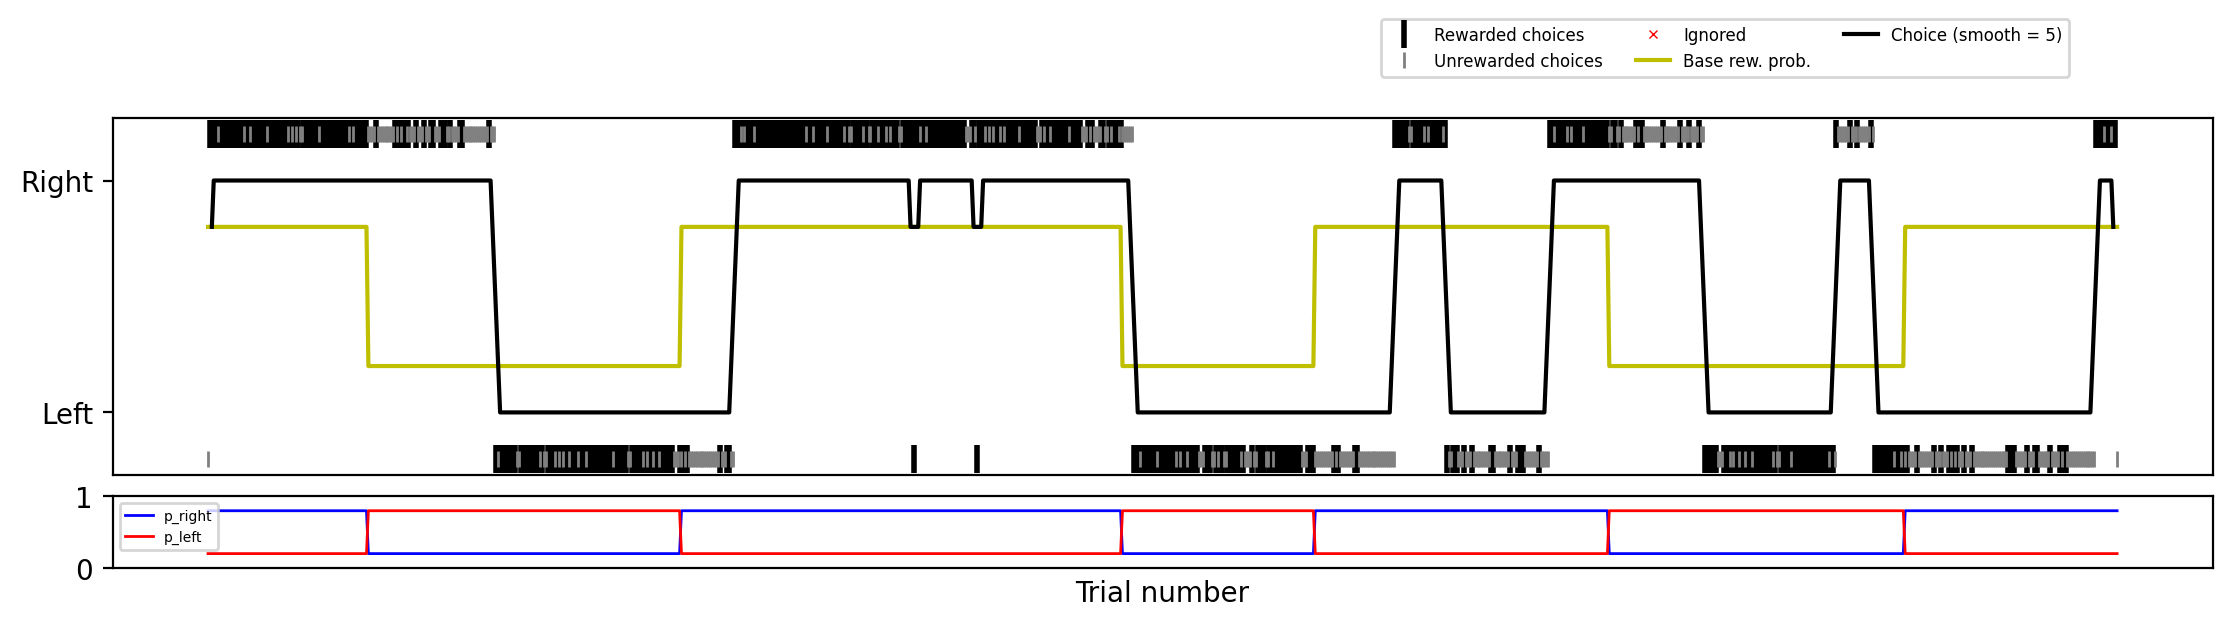

In [5]:
plot_session_lightweight(choice_history=agent.choice_history,
                         reward_history_non_autowater=agent.reward_history,
                         p_reward=task.p_reward);

Parameter recovery

In [7]:
agent.fit_history(agent.choice_history, agent.reward_history)

             message: Optimization terminated successfully.
             success: True
                 fun: 60.83742747495445
                   x: [ 6.290e-01  2.859e-01  4.944e-01  3.327e-02
                        3.273e-01]
                 nit: 23
                nfev: 2004
          population: [[ 6.227e-01  2.901e-01 ...  4.649e-02  3.308e-01]
                       [ 5.818e-01  2.475e-01 ...  8.488e-02  3.971e-01]
                       ...
                       [ 6.071e-01  2.582e-01 ...  1.597e-02  4.731e-01]
                       [ 5.676e-01  2.880e-01 ...  2.736e-01  2.894e-01]]
 population_energies: [ 6.084e+01  6.194e+01 ...  6.158e+01  6.186e+01]
                 jac: [-1.532e-03 -1.253e-03  2.206e-03  6.970e-04
                        1.426e-03]
             k_model: 5
            n_trials: 1001
      log_likelihood: -60.83742747495445
                 AIC: 131.6748549499089
                 BIC: 156.218628846485
                 LPT: 0.9410333953394151
             

Ground truth

In [8]:
agent.get_fitparams_values()

[0.5, 0.3, 0.5, 0.1, 0.3]